In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import os


%matplotlib inline

In [2]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image

In [3]:
def get_images(dir_path):
    images = np.array([get_image(os.path.join(dir_path, img_name)) for img_name in os.listdir(dir_path)])
    return images

In [4]:
def get_matches(images, dist=0.5, matches_count=5):
    correct_matches_all = []
    for j in range(len(images)):
        correct_matches_dct = []
        for i in range(len(images)):
            if i!=j:
                sift = cv2.SIFT_create()
                _, des1 = sift.detectAndCompute(images[j], None)
                _, des2 = sift.detectAndCompute(images[i], None)
                try:
                    bf = cv2.BFMatcher()
                    matches = bf.knnMatch(des1, des2, k=2)
                    correct_matches = []
                    for m, n in matches:
                        if m.distance < dist*n.distance:
                            correct_matches.append([m])
                            if len(correct_matches) > matches_count:
                                correct_matches_dct.append(tuple([i, j]))
                except: pass
        correct_matches_all.extend(correct_matches_dct)
    return correct_matches_all

In [5]:
def connected_tuples(pairs):
    # for every element, we keep a reference to the list it belongs to
    lists_by_element = {}

    def make_new_list_for(x, y):
        lists_by_element[x] = lists_by_element[y] = [x, y]

    def add_element_to_list(lst, el):
        lst.append(el)
        lists_by_element[el] = lst

    def merge_lists(lst1, lst2):
        merged_list = lst1 + lst2
        for el in merged_list:
            lists_by_element[el] = merged_list

    for x, y in pairs:
        xList = lists_by_element.get(x)
        yList = lists_by_element.get(y)

        if not xList and not yList:
            make_new_list_for(x, y)

        if xList and not yList:
            add_element_to_list(xList, y)

        if yList and not xList:
            add_element_to_list(yList, x)            

        if xList and yList and xList != yList:
            merge_lists(xList, yList)

    # return the unique lists present in the dictionary
    return set(tuple(l) for l in lists_by_element.values())

In [6]:
images = get_images('train')
matches = get_matches(images)
groups = connected_tuples(matches)

C:\Users\vorot\AppData\Local\Temp/ipykernel_28788/3974072361.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  images = np.array([get_image(os.path.join(dir_path, img_name)) for img_name in os.listdir(dir_path)])


C:\Users\vorot\AppData\Local\Temp/ipykernel_28788/2123112203.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(10, 10))


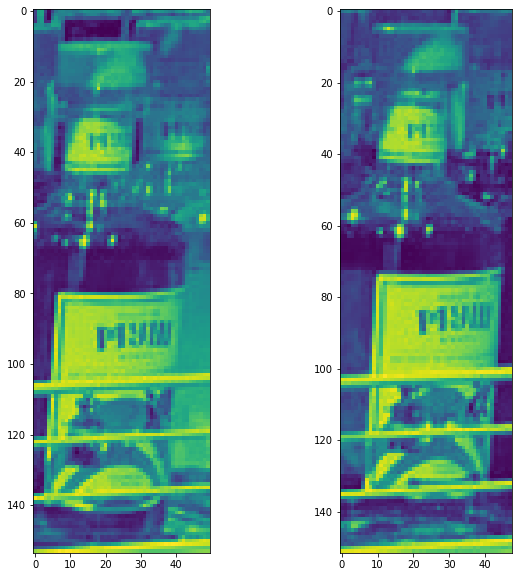

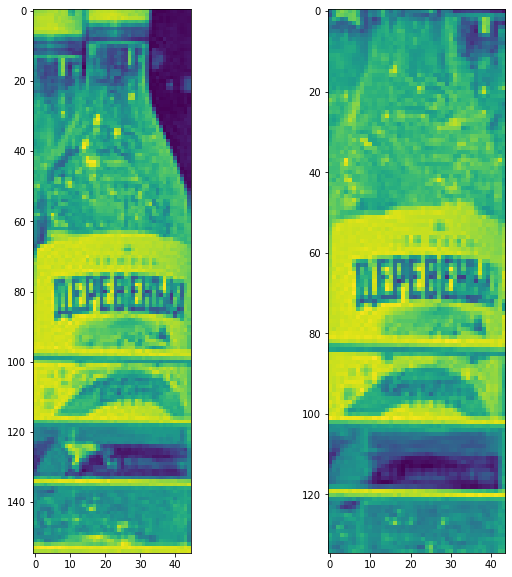

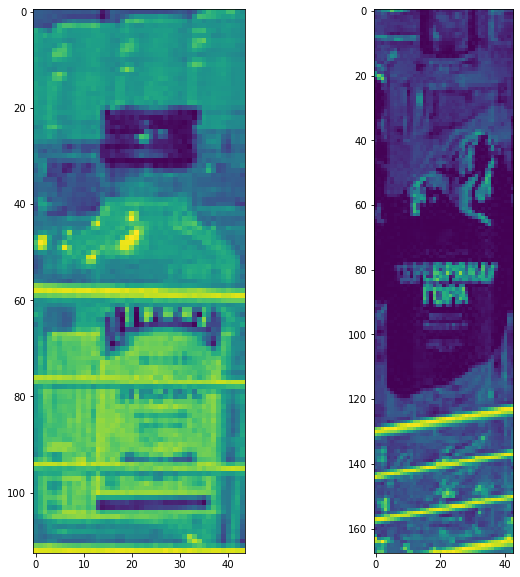

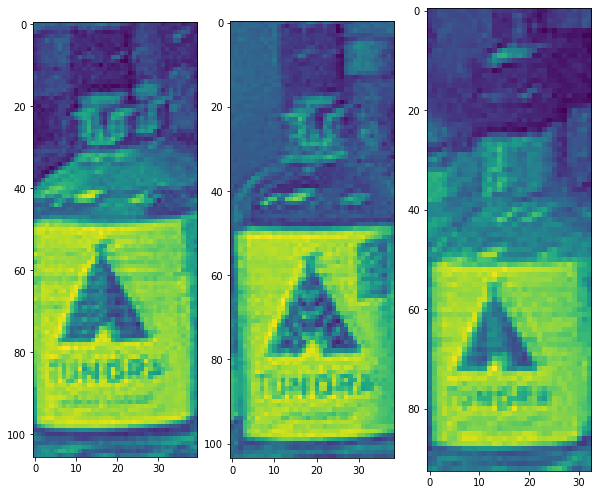

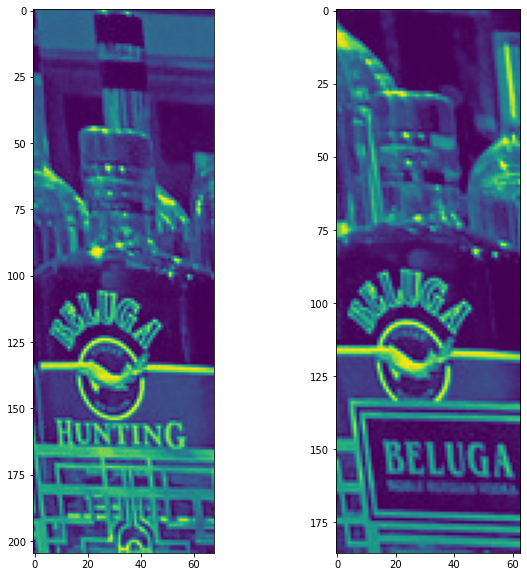

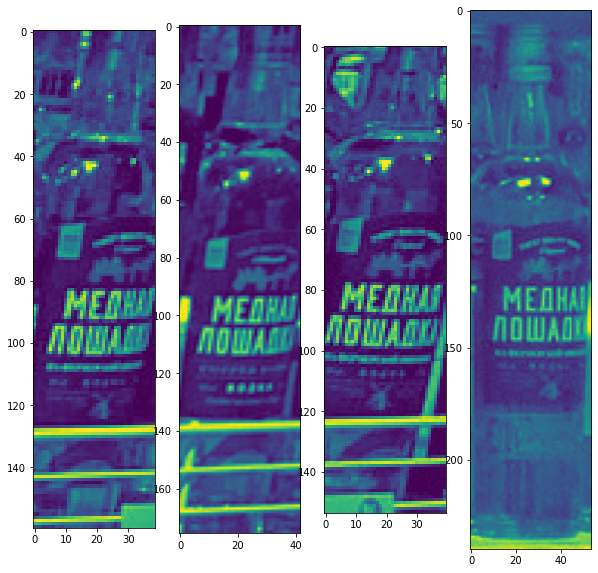

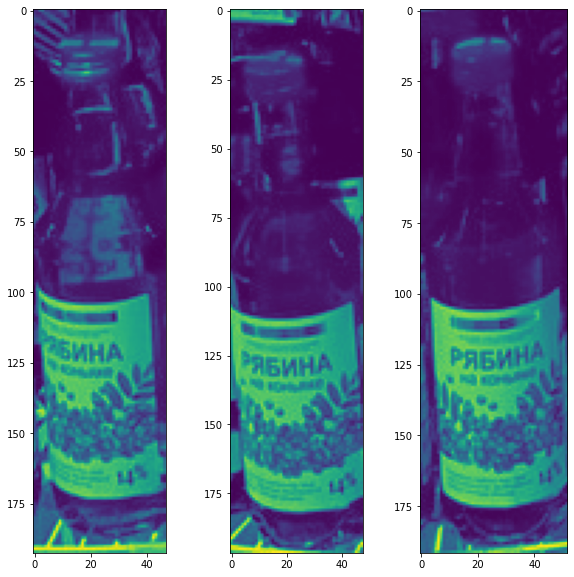

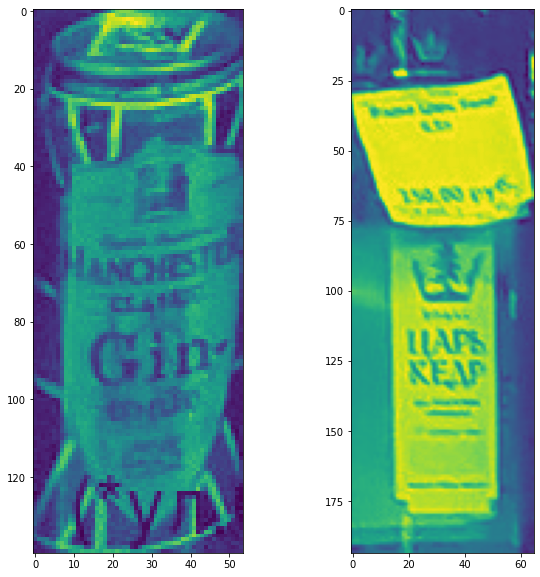

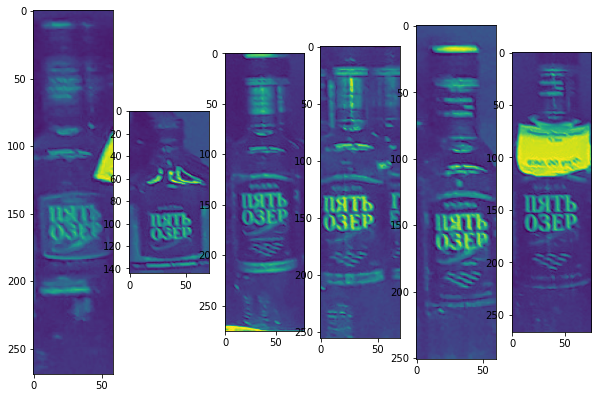

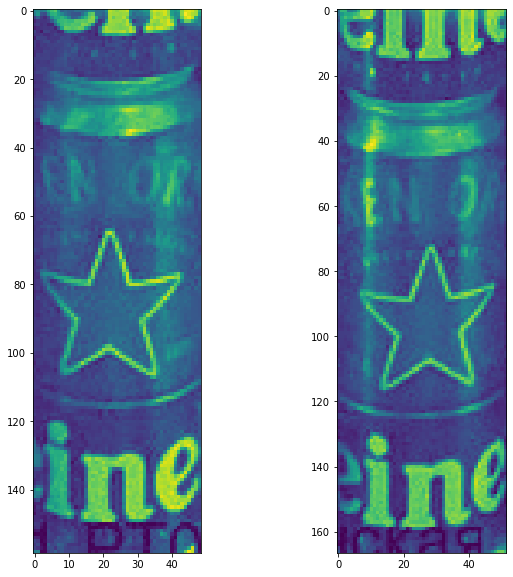

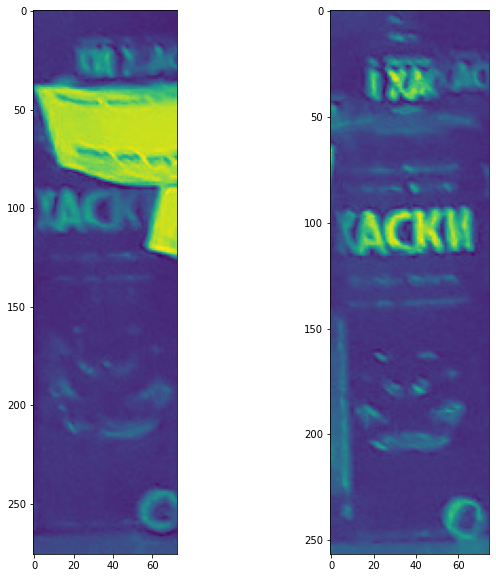

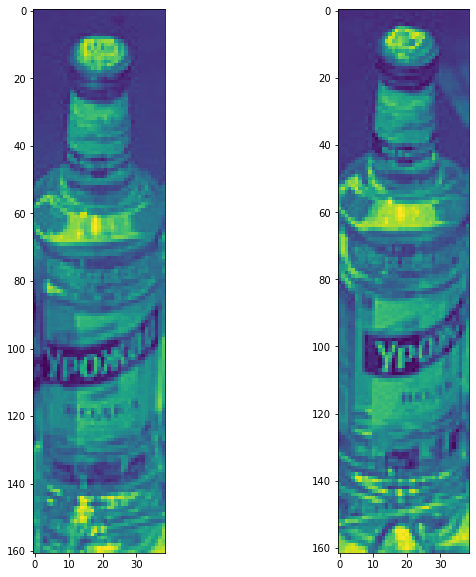

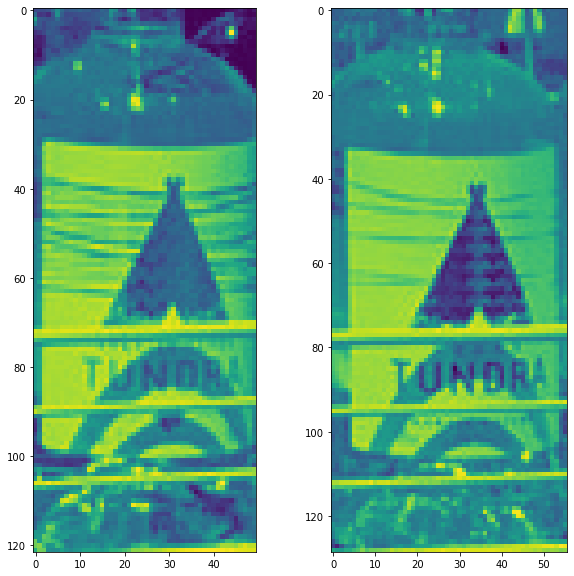

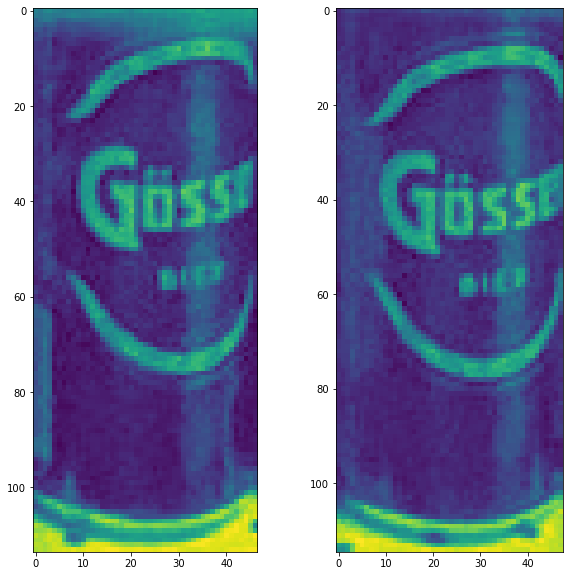

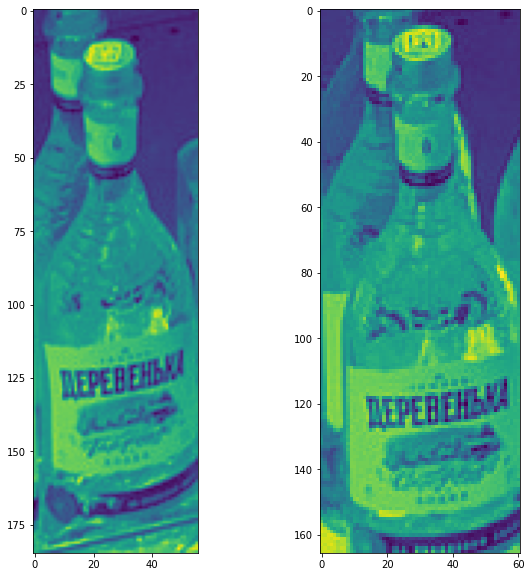

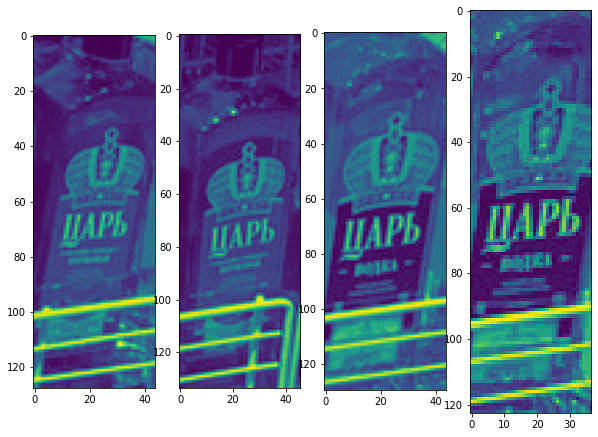

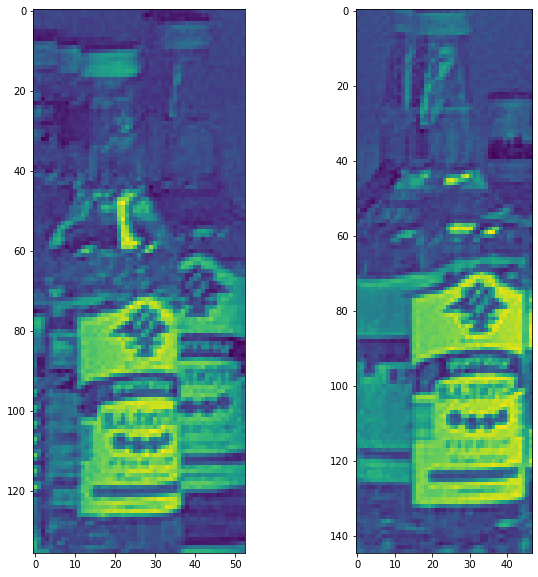

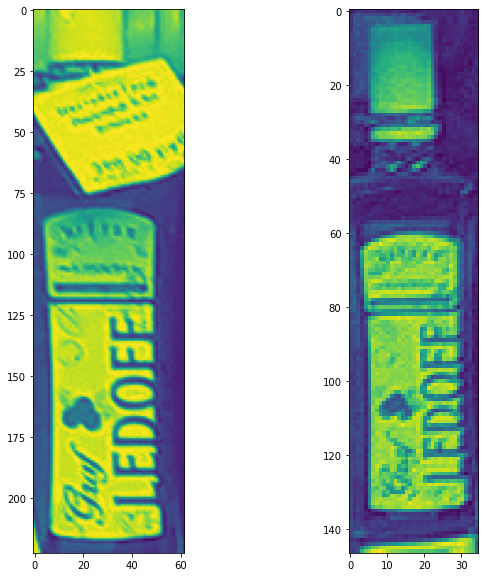

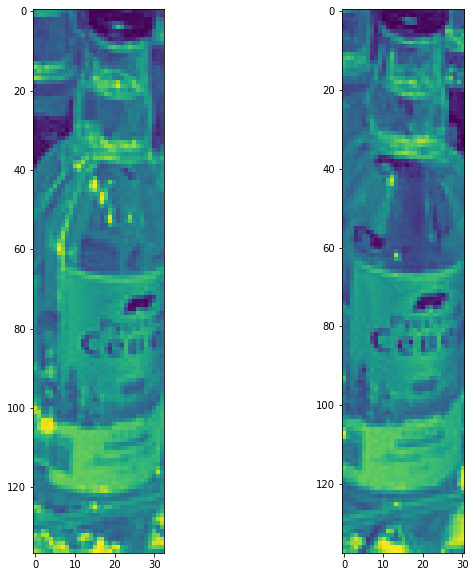

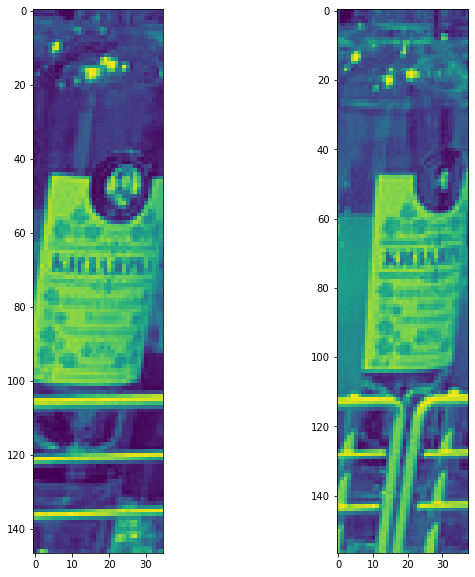

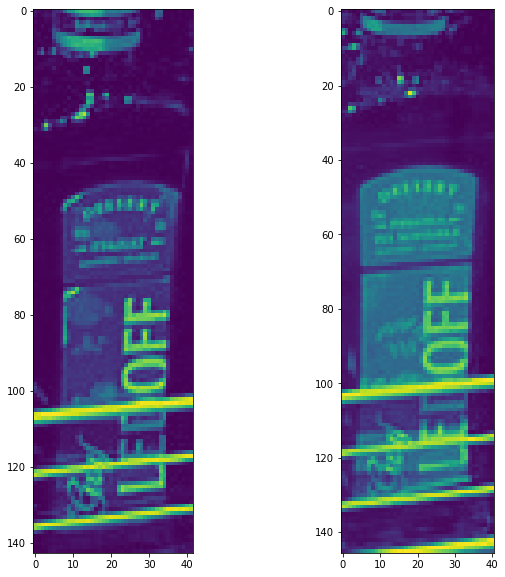

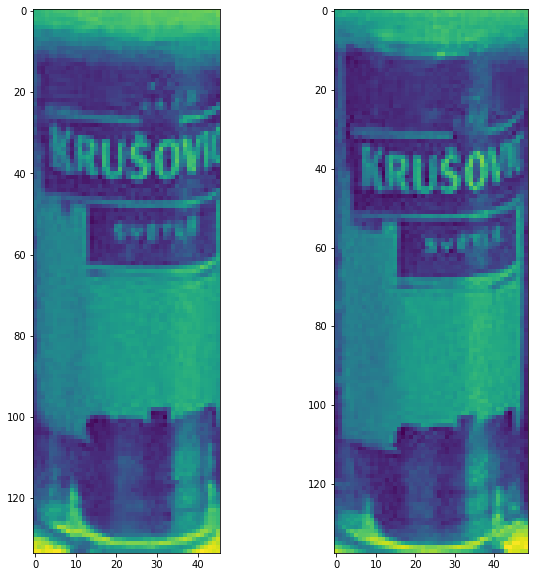

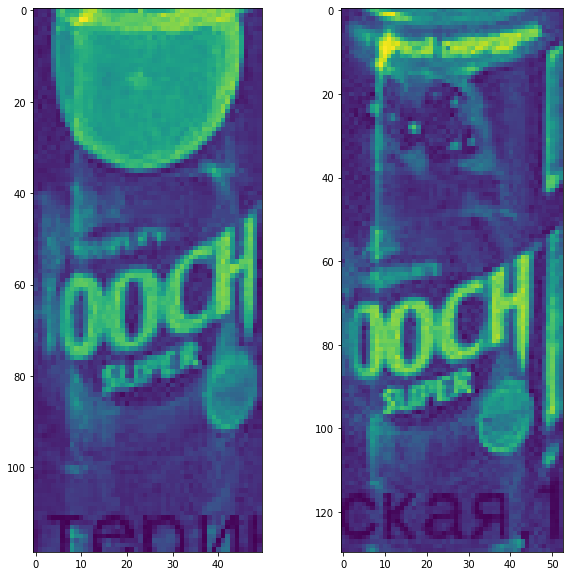

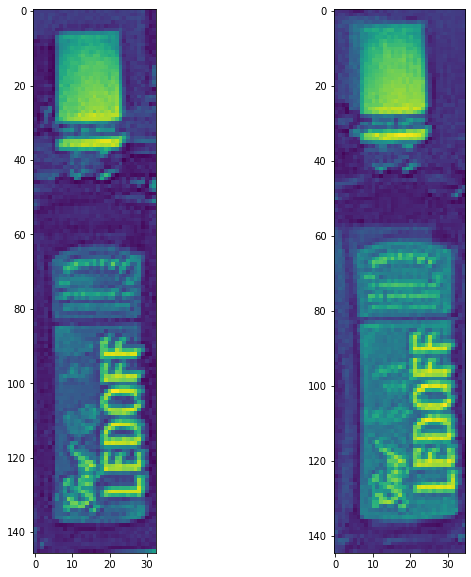

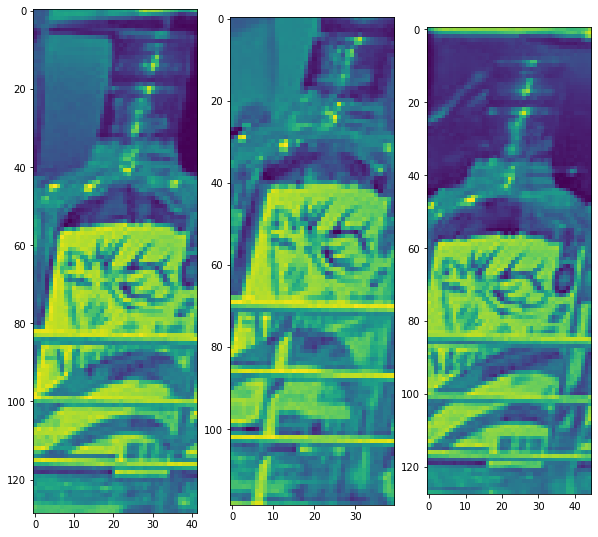

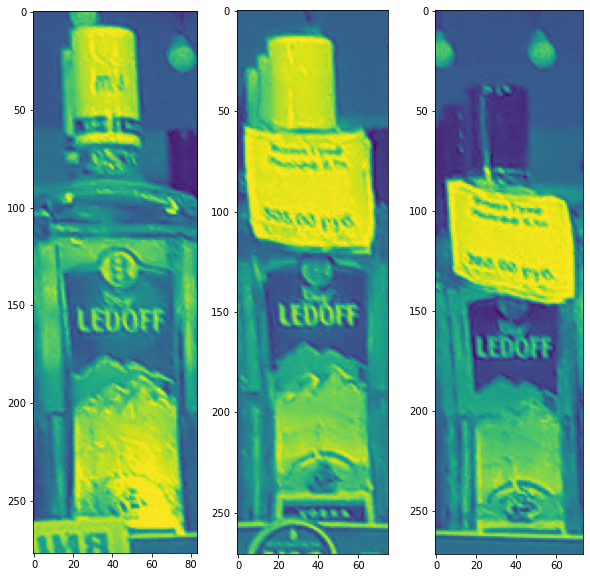

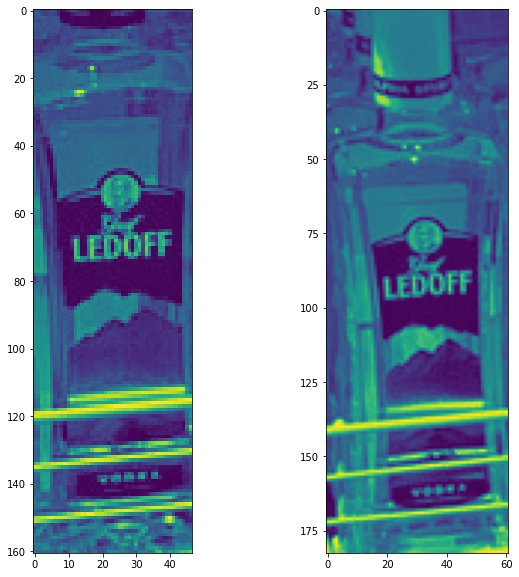

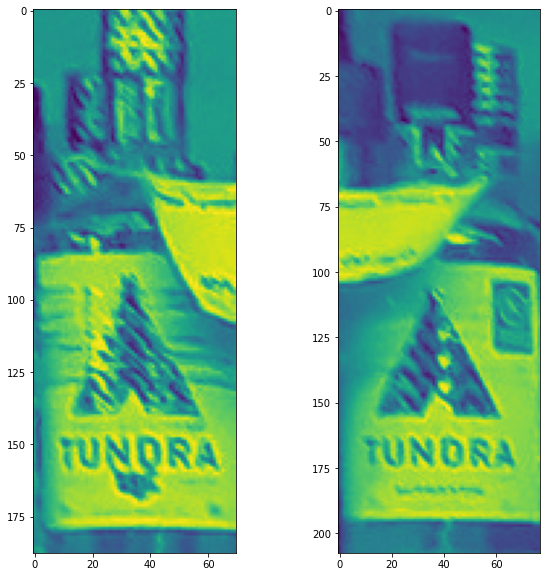

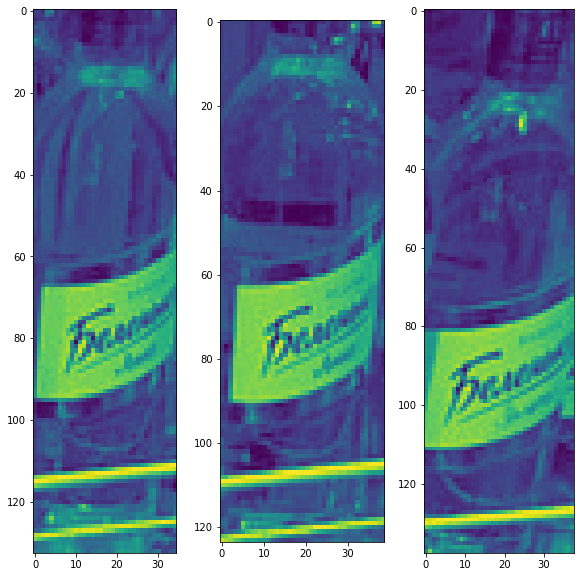

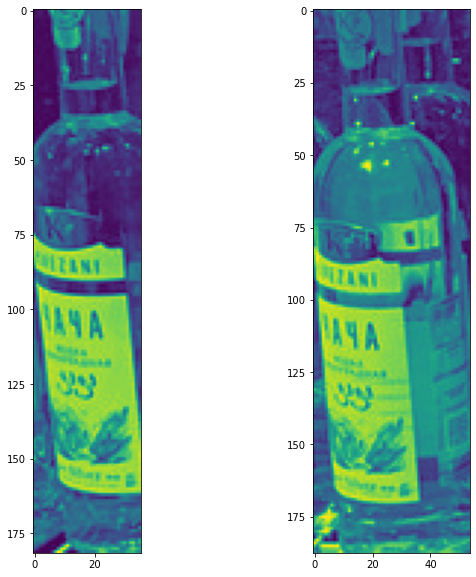

In [7]:
for group in groups:
    plt.figure(figsize=(10, 10))
    for i in range(len(group)):
        plt.subplot(1, len(group), i+1)
        plt.imshow(images[group[i]])